In [1]:
# Import packages
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # for reproducibility
X = np.random.rand(100, 1)*5  # 100 data points between 0 and 1
y = (X > 2).astype(int)  # Binary target variable

In [2]:
X

array([[2.74406752],
       [3.57594683],
       [3.01381688],
       [2.72441591],
       [2.118274  ],
       [3.22947057],
       [2.18793606],
       [4.458865  ],
       [4.8183138 ],
       [1.91720759],
       [3.95862519],
       [2.6444746 ],
       [2.84022281],
       [4.62798319],
       [0.35518029],
       [0.4356465 ],
       [0.10109199],
       [4.16309923],
       [3.89078375],
       [4.35006074],
       [4.89309171],
       [3.99579282],
       [2.30739681],
       [3.90264588],
       [0.59137213],
       [3.19960511],
       [0.71676644],
       [4.72334459],
       [2.60924161],
       [2.0733097 ],
       [1.32277806],
       [3.87116845],
       [2.28075166],
       [2.84216974],
       [0.093949  ],
       [3.08817749],
       [3.06047861],
       [3.08466998],
       [4.71874039],
       [3.4091015 ],
       [1.7975395 ],
       [2.18515977],
       [3.48815598],
       [0.30112736],
       [3.33383358],
       [3.35318935],
       [1.05191281],
       [0.644

In [3]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [4]:
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [5]:
# Logistic Regression Model Class
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [14]:
# Hyperparameters
learning_rate = 0.01
iterations = 5000

# Initialize the logistic regression model
model = LogisticRegression()


In [15]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
cost_history = []
for epoch in range(iterations):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost_history.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{iterations}], Loss: {loss.item():.4f}')

Epoch [100/5000], Loss: 0.5177
Epoch [200/5000], Loss: 0.4681
Epoch [300/5000], Loss: 0.4428
Epoch [400/5000], Loss: 0.4214
Epoch [500/5000], Loss: 0.4022
Epoch [600/5000], Loss: 0.3848
Epoch [700/5000], Loss: 0.3689
Epoch [800/5000], Loss: 0.3545
Epoch [900/5000], Loss: 0.3413
Epoch [1000/5000], Loss: 0.3293
Epoch [1100/5000], Loss: 0.3182
Epoch [1200/5000], Loss: 0.3080
Epoch [1300/5000], Loss: 0.2986
Epoch [1400/5000], Loss: 0.2898
Epoch [1500/5000], Loss: 0.2818
Epoch [1600/5000], Loss: 0.2742
Epoch [1700/5000], Loss: 0.2672
Epoch [1800/5000], Loss: 0.2607
Epoch [1900/5000], Loss: 0.2546
Epoch [2000/5000], Loss: 0.2489
Epoch [2100/5000], Loss: 0.2435
Epoch [2200/5000], Loss: 0.2384
Epoch [2300/5000], Loss: 0.2336
Epoch [2400/5000], Loss: 0.2291
Epoch [2500/5000], Loss: 0.2248
Epoch [2600/5000], Loss: 0.2208
Epoch [2700/5000], Loss: 0.2170
Epoch [2800/5000], Loss: 0.2133
Epoch [2900/5000], Loss: 0.2099
Epoch [3000/5000], Loss: 0.2066
Epoch [3100/5000], Loss: 0.2034
Epoch [3200/5000]

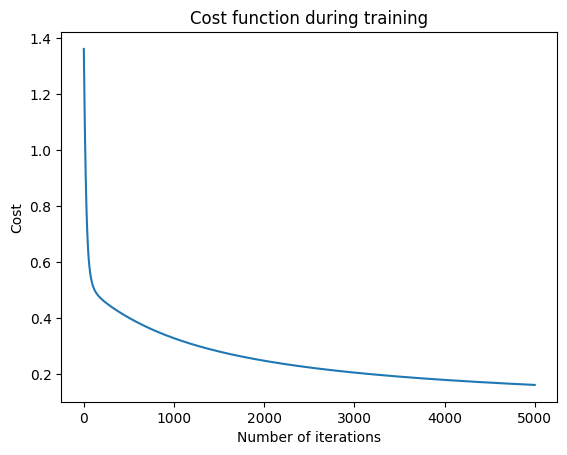

In [16]:
# Plotting the cost function
plt.plot(range(iterations), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost function during training')
plt.show()


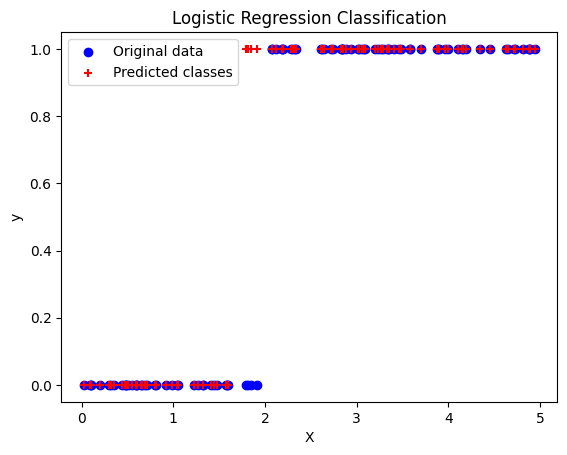

In [18]:

# Making predictions
# Predicting on the training data
with torch.no_grad():
    y_pred_prob = model(X_tensor)
    y_pred_class = (y_pred_prob >= 0.5).float()

# Plotting the results
plt.scatter(X, y, color='blue', label='Original data')
plt.scatter(X, y_pred_class.numpy(), color='red', label='Predicted classes', marker='+')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Classification')
plt.legend()
plt.show()